In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from functools import reduce

In [2]:
from IPython.display import display, HTML
import plotly as py
import plotly.graph_objs as go


In [3]:
calender = pd.read_csv('m5-forecasting-accuracy/calendar.csv', parse_dates=['date'])
print("Calender Sample")
calender.head()

Calender Sample


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
calender.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [5]:
for (name, data) in calender.iteritems():
    print('Missing Values in Column ', name,": ", data.isnull().values.any())

Missing Values in Column  date :  False
Missing Values in Column  wm_yr_wk :  False
Missing Values in Column  weekday :  False
Missing Values in Column  wday :  False
Missing Values in Column  month :  False
Missing Values in Column  year :  False
Missing Values in Column  d :  False
Missing Values in Column  event_name_1 :  True
Missing Values in Column  event_type_1 :  True
Missing Values in Column  event_name_2 :  True
Missing Values in Column  event_type_2 :  True
Missing Values in Column  snap_CA :  False
Missing Values in Column  snap_TX :  False
Missing Values in Column  snap_WI :  False


In [6]:
events1 = calender[['event_type_1','event_name_1',]]
events1.columns = ["event_type","event_name"]
events2 = calender[['event_type_2','event_name_2',]]
events2.columns = ["event_type","event_name"]
events = pd.concat([events1,events2],ignore_index = True)
events = events.dropna()
print("Event Count w/Duplicates")
events.count()

Event Count w/Duplicates


event_type    167
event_name    167
dtype: int64

In [7]:
events_dict = {k: g["event_name"].tolist() for k,g in events.groupby("event_type")}
print("Event List w/Duplicates, Grouped by Event Type")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List w/Duplicates, Grouped by Event Type


,Cultural,National,Religious,Sporting
0,ValentinesDay,PresidentsDay,LentStart,SuperBowl
1,StPatricksDay,MemorialDay,LentWeek2,NBAFinalsStart
2,Cinco De Mayo,IndependenceDay,Purim End,NBAFinalsEnd
3,Mother's day,LaborDay,OrthodoxEaster,SuperBowl
4,Father's day,ColumbusDay,Pesach End,NBAFinalsStart
5,Halloween,VeteransDay,Ramadan starts,NBAFinalsEnd
6,ValentinesDay,Thanksgiving,Eid al-Fitr,SuperBowl
7,StPatricksDay,Christmas,EidAlAdha,NBAFinalsStart
8,Easter,NewYear,Chanukah End,NBAFinalsEnd
9,Cinco De Mayo,MartinLutherKingDay,OrthodoxChristmas,SuperBowl


In [8]:
events_dict = {k: g["event_type"].tolist() for k,g in events.groupby("event_name")}
print("Event List w/Duplicates, Grouped by Event Name")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List w/Duplicates, Grouped by Event Name


,Chanukah End,Christmas,Cinco De Mayo,ColumbusDay,Easter,Eid al-Fitr,EidAlAdha,Father's day,Halloween,IndependenceDay,...,OrthodoxEaster,Pesach End,PresidentsDay,Purim End,Ramadan starts,StPatricksDay,SuperBowl,Thanksgiving,ValentinesDay,VeteransDay
0,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
1,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
2,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
3,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
4,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
5,NaN,NaN,Cultural,NaN,Cultural,NaN,NaN,Cultural,NaN,NaN,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,NaN,Cultural,NaN


In [9]:
events = events.drop_duplicates()
print("Event Count w/o Duplicates")
events.count()

Event Count w/o Duplicates


event_type    30
event_name    30
dtype: int64

In [10]:
events_dict = {k: g["event_name"].tolist() for k,g in events.groupby("event_type")}
print("Event List w/o Duplicates")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List w/o Duplicates


,Cultural,National,Religious,Sporting
0,ValentinesDay,PresidentsDay,LentStart,SuperBowl
1,StPatricksDay,MemorialDay,LentWeek2,NBAFinalsStart
2,Cinco De Mayo,IndependenceDay,Purim End,NBAFinalsEnd
3,Mother's day,LaborDay,OrthodoxEaster,NaN
4,Father's day,ColumbusDay,Pesach End,NaN
5,Halloween,VeteransDay,Ramadan starts,NaN
6,Easter,Thanksgiving,Eid al-Fitr,NaN
7,NaN,Christmas,EidAlAdha,NaN
8,NaN,NewYear,Chanukah End,NaN
9,NaN,MartinLutherKingDay,OrthodoxChristmas,NaN


In [11]:
snap_data = calender.groupby(['year','month'])['snap_CA','snap_TX','snap_WI'].sum().reset_index()
print("SNAP days for each month across the years for all the states")
snap_data.pivot(index="month",columns = "year",values = ["snap_CA","snap_TX","snap_WI"])

SNAP days for each month across the years for all the states


snap_CA                               snap_TX                          \
year     2011  2012  2013  2014  2015  2016    2011  2012  2013  2014  2015   
month                                                                         
1         0.0  10.0  10.0  10.0  10.0  10.0     0.0  10.0  10.0  10.0  10.0   
2        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
3        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
4        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
5        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
6        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
7        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
8        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
9        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
10       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
11       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
12       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   

            snap_WI                                
year   2016    2011  2012  2013  2014  2015  2016  
month                                              
1      10.0     0.0  10.0  10.0  10.0  10.0  10.0  
2      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
3      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
4      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
5      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
6      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
7       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
8       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
9       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
10      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
11      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
12      NaN    10.0  10.0  10.0  10.0  10.0   NaN

In [12]:
sales = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
print("Sales Data Sample")
sales.head()

Sales Data Sample


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [13]:
missing = 0
# print(sales.count())
for (name, data) in sales.iteritems():
    if(data.isnull().values.any()):
        print('Missing Values in Column ', name)
        missing = 1
if (not missing):
    print("No Missing Values!")

No Missing Values!


In [14]:
date = [col for col in sales if col.startswith('d_')]
sales['total_sales'] = sales[date].sum(axis=1)

In [15]:
(sales.groupby('state_id').agg({"total_sales":"sum"})/sales.total_sales.sum() * 100).reset_index()

,state_id,total_sales
0,CA,43.649240
1,TX,28.767621
2,WI,27.583139


In [16]:
def pie_chart(data, labels, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(title,fontweight = "bold")
    ax.axis('equal')
    plt.show()
    fig.savefig(title)

States:  ['CA' 'TX' 'WI']
States' Statistics: 
CA    12196
WI     9147
TX     9147
Name: state_id, dtype: int64


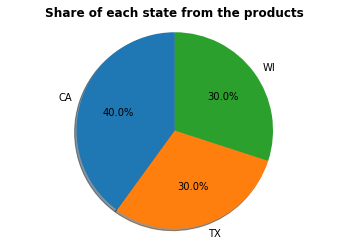

In [17]:
states = sales["state_id"].unique()
print("States: ", states)
states = sales["state_id"].value_counts()
print("States' Statistics: ")
print(states)
pie_chart(sales["state_id"].value_counts(),sales["state_id"].unique(),"Share of each state from the products")

Stores:  ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
Stores' Statistics: 
WI_2    3049
TX_1    3049
TX_3    3049
WI_3    3049
CA_2    3049
TX_2    3049
CA_4    3049
CA_3    3049
WI_1    3049
CA_1    3049
Name: store_id, dtype: int64


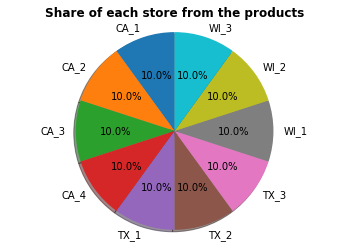

In [18]:
stores = sales["store_id"].unique()
print("Stores: ", stores)
stores = sales["store_id"].value_counts()
print("Stores' Statistics: ")
print(stores)
pie_chart(sales["store_id"].value_counts(),sales["store_id"].unique(),"Share of each store from the products")

Categories:  ['HOBBIES' 'HOUSEHOLD' 'FOODS']
Categories' Statistics: 
FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64


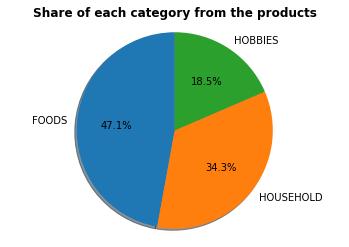

In [19]:
categories = sales["cat_id"].unique()
print("Categories: ", categories)
categories = sales["cat_id"].value_counts()
print("Categories' Statistics: ")
print(categories)
pie_chart(sales["cat_id"].value_counts(),sales["cat_id"].value_counts().index,"Share of each category from the products")

Departments:  ['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']
Departments' Statistics: 
FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64


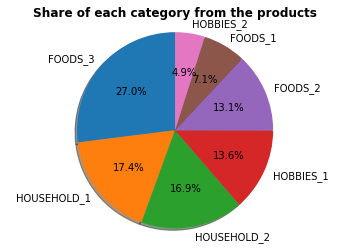

In [20]:
departments = sales["dept_id"].unique()
print("Departments: ", departments)
departments = sales["dept_id"].value_counts()
print("Departments' Statistics: ")
print(departments)
pie_chart(sales["dept_id"].value_counts(),sales["dept_id"].value_counts().index,"Share of each category from the products")

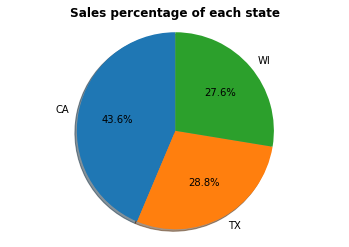

In [21]:
sales['total_sales'] = sales[date].sum(axis=1)
statewise_sales = (sales.groupby('state_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(statewise_sales['total_sales'], statewise_sales['state_id'], "Sales percentage of each state")

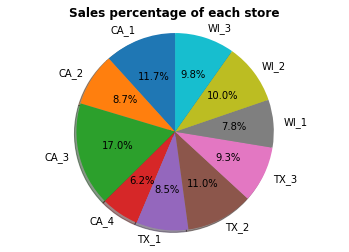

In [22]:
storewise_sales = (sales.groupby('store_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(storewise_sales['total_sales'], storewise_sales['store_id'], "Sales percentage of each store")

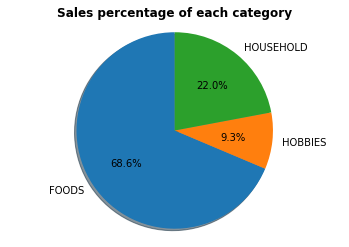

In [23]:
categoryewise_sales = (sales.groupby('cat_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(categoryewise_sales['total_sales'], categoryewise_sales['cat_id'], "Sales percentage of each category")

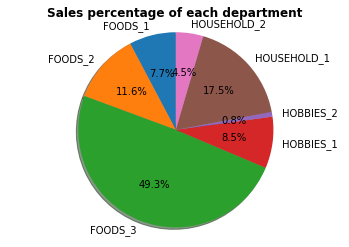

In [24]:
departmentewise_sales = (sales.groupby('dept_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(departmentewise_sales['total_sales'], departmentewise_sales['dept_id'], "Sales percentage of each department")

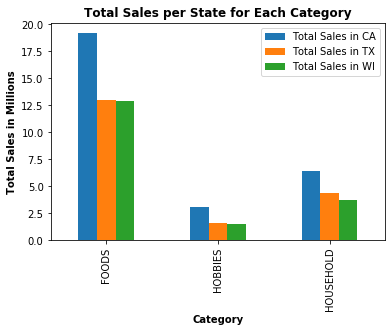

In [25]:
cat_state = sales.groupby(['cat_id','state_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Sales per State for Each Category",fontweight = "bold")
plt.xlabel("Category",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA', 'Total Sales in TX','Total Sales in WI'])
plt.savefig("Total Sales per State for Each Category.png")

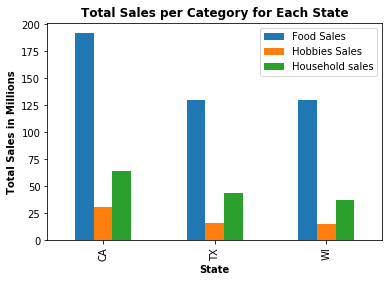

In [26]:
cat_state = sales.groupby(['state_id','cat_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Sales per Category for Each State",fontweight = "bold")
plt.xlabel("State",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Food Sales', 'Hobbies Sales','Household sales'])
plt.savefig("Total Sales per Category for each State.png")

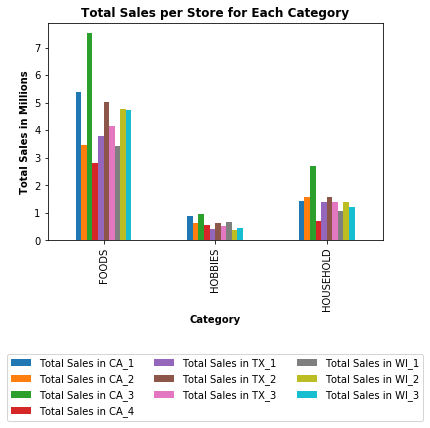

In [27]:
cat_state = sales.groupby(['cat_id','store_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Sales per Store for Each Category",fontweight = "bold")
plt.xlabel("Category",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA_1','Total Sales in CA_2','Total Sales in CA_3','Total Sales in CA_4', 'Total Sales in TX_1', 'Total Sales in TX_2', 'Total Sales in TX_3', 'Total Sales in WI_1', 'Total Sales in WI_2', 'Total Sales in WI_3'], loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
plt.savefig("Total Sales per Store for Each Category.png")

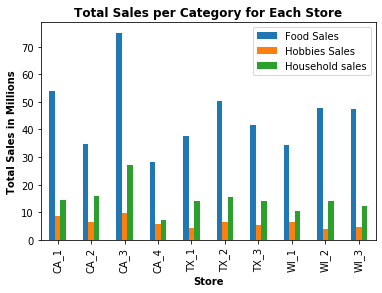

In [28]:
cat_state = sales.groupby(['store_id','cat_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Sales per Category for Each Store",fontweight = "bold")
plt.xlabel("Store",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Food Sales', 'Hobbies Sales','Household sales'])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
plt.savefig("Total Sales per Category for Each Store.png")

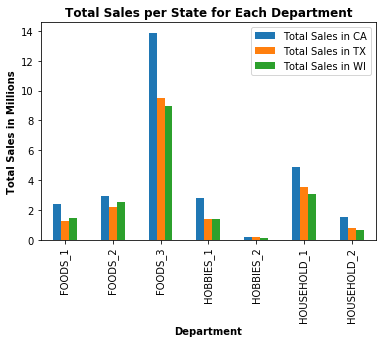

In [29]:
dept_state = sales.groupby(['dept_id','state_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Sales per State for Each Department",fontweight = "bold")
plt.xlabel("Department",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA', 'Total Sales in TX','Total Sales in WI'])
plt.savefig("Total Sales per State for Each Department.png")

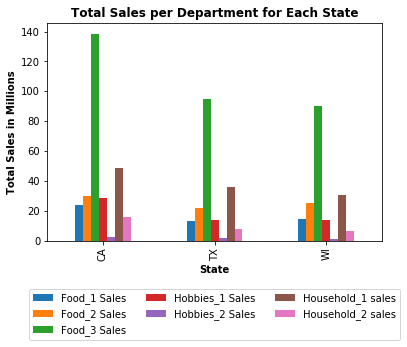

In [30]:
dept_state = sales.groupby(['state_id','dept_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Sales per Department for Each State",fontweight = "bold")
plt.xlabel("State",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Food_1 Sales', 'Food_2 Sales', 'Food_3 Sales', 'Hobbies_1 Sales', 'Hobbies_2 Sales','Household_1 sales', 'Household_2 sales'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3 )
plt.savefig("Total Sales per Department for each State.png")


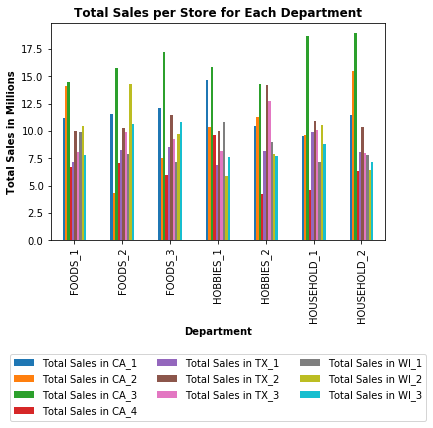

In [31]:
dept_state = sales.groupby(['dept_id','store_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 *x / float(x.sum())).unstack().plot(kind='bar')
plt.title("Total Sales per Store for Each Department",fontweight = "bold")
plt.xlabel("Department",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA_1','Total Sales in CA_2','Total Sales in CA_3','Total Sales in CA_4', 'Total Sales in TX_1', 'Total Sales in TX_2', 'Total Sales in TX_3', 'Total Sales in WI_1', 'Total Sales in WI_2', 'Total Sales in WI_3'], loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
plt.savefig("Total Sales per Store for Each Department.png")

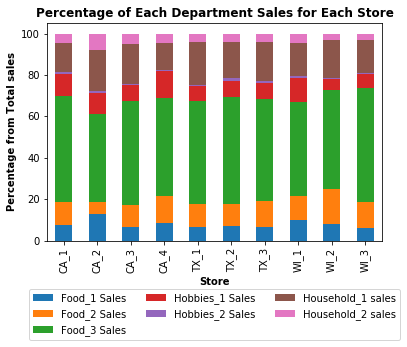

In [32]:
dept_state = sales.groupby(['store_id','dept_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 *x / float(x.sum())).unstack().plot(kind='bar', stacked = True)
plt.title("Percentage of Each Department Sales for Each Store",fontweight = "bold")
plt.xlabel("Store",fontweight = "bold")
plt.ylabel("Percentage from Total sales",fontweight = "bold")
plt.legend(labels=['Food_1 Sales', 'Food_2 Sales', 'Food_3 Sales', 'Hobbies_1 Sales', 'Hobbies_2 Sales','Household_1 sales', 'Household_2 sales'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.savefig("Percentage of Each Department Sales for Each Store.png")

In [33]:
# def plot():
#     sns.set()
#     df_plot = df_time.resample('M').mean()
#     plt.plot(df_plot)
#     plt.title('Air polution by O3 and PM10')
#     plt.ylabel('micrograms per cubic meter (mg/m3)')
#     plt.xticks(rotation=45)
#     plt.show()
#     return

In [34]:
start_date = datetime(2011,1,29)
end_date = datetime(2016,6,19)

In [35]:
sales_ts = pd.DataFrame(sales[date].sum(axis =0),columns = ["total_sales"])
sales_ts['date'] = pd.date_range(start_date, periods=1913).tolist()
sales_ts.set_index('date', drop=True, inplace=True)
sales_ts.head()

,total_sales
date,
2011-01-29,32631
2011-01-30,31749
2011-01-31,23783
2011-02-01,25412
2011-02-02,19146


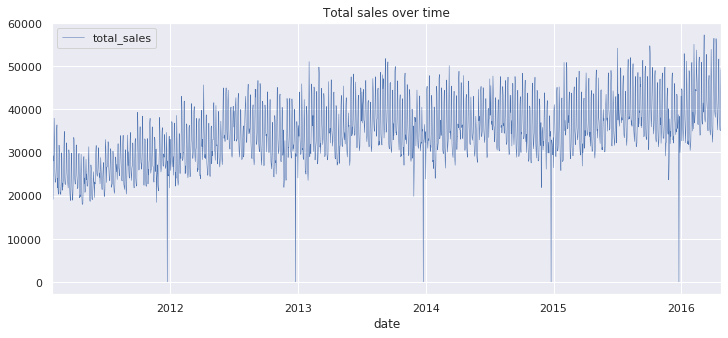

In [36]:
sns.set(rc={'figure.figsize':(12, 5)})
sales_ts.plot(linewidth=0.5)
plt.title("Total sales over time")
plt.savefig("Total sales over time")

In [49]:
result = seasonal_decompose(sales_ts, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

             total_sales
date                    
2011-01-29           NaN
2011-01-30           NaN
2011-01-31           NaN
2011-02-01  27134.571429
2011-02-02  27891.857143
...                  ...
2016-04-20  41017.714286
2016-04-21  40754.142857
2016-04-22           NaN
2016-04-23           NaN
2016-04-24           NaN

[1913 rows x 1 columns]
            total_sales
date                   
2011-01-29  7217.734738
2011-01-30  6789.470558
2011-01-31 -1459.929127
2011-02-01 -3957.591777
2011-02-02 -4324.895806
...                 ...
2016-04-20 -4324.895806
2016-04-21 -4139.353682
2016-04-22  -125.434904
2016-04-23  7217.734738
2016-04-24  6789.470558

[1913 rows x 1 columns]
            total_sales
date                   
2011-01-29          NaN
2011-01-30          NaN
2011-01-31          NaN
2011-02-01  2235.020348
2011-02-02 -4420.961337
...                 ...
2016-04-20 -1349.818480
2016-04-21 -1581.789176
2016-04-22          NaN
2016-04-23          NaN
2016-04-24          NaN



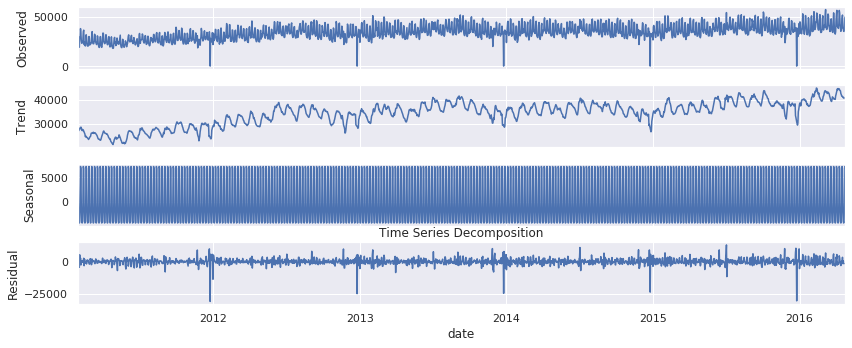

In [51]:
result.plot()
plt.title("Time Series Decomposition")
plt.savefig("Time Series Decomposition.png")

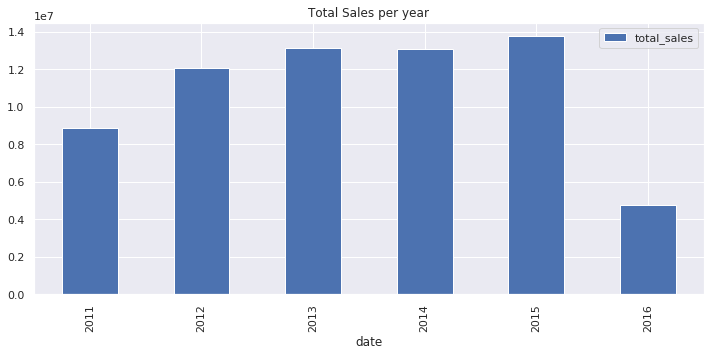

In [37]:
sales_ts.groupby(sales_ts.index.year).sum().plot(kind='bar')
plt.title("Total Sales per year")
plt.savefig("Total Sales per year.png")

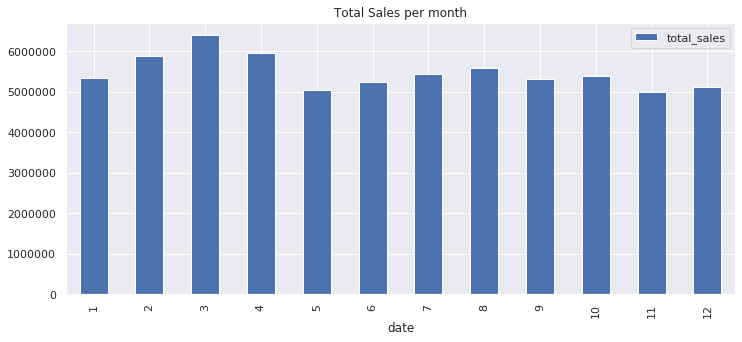

In [38]:
sales_ts.groupby(sales_ts.index.month).sum().plot(kind = "bar")
plt.title("Total Sales per month")
plt.savefig("Total Sales per month.png")

In [111]:
gdf = sales_events1.groupby(sales_events1.index.month)
for key, item in gdf:
    print(gdf.get_group(key), "\n\n")

            total_sales           event_name event_type
date                                                   
2012-01-01        21807              NewYear   National
2012-01-07        37143    OrthodoxChristmas  Religious
2012-01-16        30548  MartinLutherKingDay   National
2013-01-01        24087              NewYear   National
2013-01-07        33517    OrthodoxChristmas  Religious
2013-01-21        30887  MartinLutherKingDay   National
2014-01-01        23845              NewYear   National
2014-01-07        30952    OrthodoxChristmas  Religious
2014-01-20        32706  MartinLutherKingDay   National
2015-01-01        26452              NewYear   National
2015-01-07        29165    OrthodoxChristmas  Religious
2015-01-19        34412  MartinLutherKingDay   National
2016-01-01        32651              NewYear   National
2016-01-07        35944    OrthodoxChristmas  Religious
2016-01-18        38340  MartinLutherKingDay   National 


            total_sales     event_name event_

In [119]:
gdf.count().sort_values('event_name',ascending = False)

,total_sales,event_name,event_type
date,,,
2,27,27,27
3,17,17,17
5,16,16,16
1,15,15,15
6,15,15,15
10,13,13,13
4,11,11,11
11,11,11,11
12,10,10,10


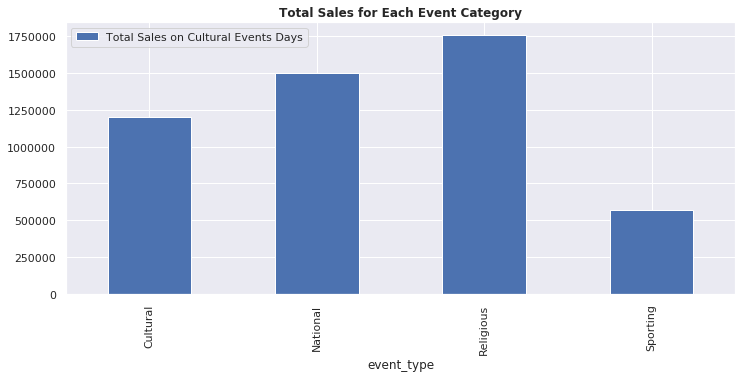

In [130]:
# gdf = sales_events1.groupby([sales_events1.index.month,'event_type']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x).unstack().plot(kind='bar')
gdf = sales_events1.groupby('event_type').agg({"total_sales":"sum"}).plot(kind='bar')
plt.title("Total Sales for Each Event Category",fontweight = "bold")
plt.legend(labels=['Total Sales on Cultural Events Days','Total Sales on National Events Days','Total Sales on Religous Events Days','Total Sales on Sporting Events Days'])
plt.savefig("Total Sales for Each Event Category.png")

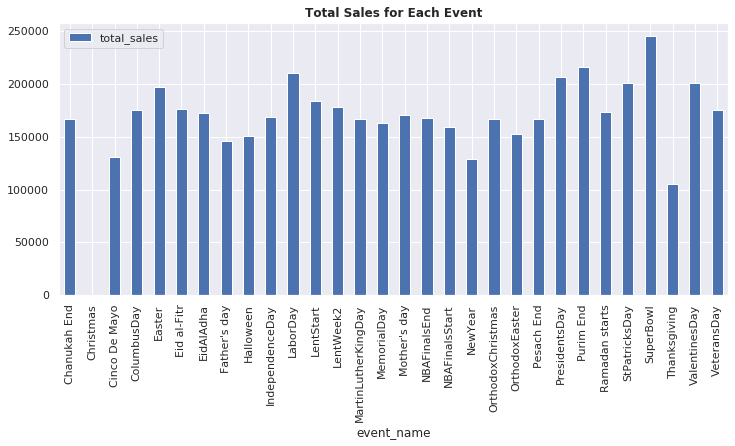

In [131]:
gdf = sales_events1.groupby('event_name').agg({"total_sales":"sum"}).plot(kind='bar')
plt.title("Total Sales for Each Event",fontweight = "bold")
plt.savefig("Total Sales for Each Event.png")

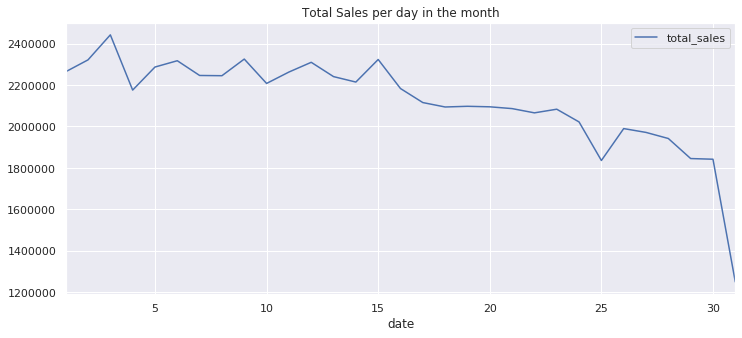

In [39]:
sales_ts.groupby(sales_ts.index.day).sum().plot()
plt.title("Total Sales per day in the month")
plt.savefig("Total Sales per day in the month.png")

In [40]:
x = pd.date_range(datetime(2011,1,1), periods=365)
dates = x.strftime('%m-%d')
sales_2011 = [np.nan for i in range (28)]
sales_2011 = sales_2011 + sales_ts.loc[sales_ts.index.year == 2011].total_sales.tolist()
sales_2012 = sales_ts.loc[sales_ts.index.year == 2012].total_sales.tolist()
sales_2013 = sales_ts.loc[sales_ts.index.year == 2013].total_sales.tolist()
sales_2014 = sales_ts.loc[sales_ts.index.year == 2014].total_sales.tolist()
sales_2015 = sales_ts.loc[sales_ts.index.year == 2015].total_sales.tolist()
sales_2016 = sales_ts.loc[sales_ts.index.year == 2016].total_sales.tolist() + [np.nan for i in range (365-115)]

sales_year_dict_2011 = {'date': dates,
    '2011' :  sales_2011,
    '2012':  sales_2012}
sales_year_dict = {
    'date': dates,
    'year2011': sales_2011,
   
    'year2013' :  sales_2013,
    'year2014' :  sales_2014,
    'year2015' :  sales_2015,
    'year2016' : sales_2016
}
sales_year_dict_2016 = {
    
}
sales_year = pd.DataFrame.from_dict(sales_year_dict).reset_index(drop = True).set_index('date', drop=True)
# events.append(pd.DataFrame(events2_dict).dropna())#subset=['event_name'])
sales_year.head()

,year2011,year2013,year2014,year2015,year2016
date,,,,,
01-01,NaN,24087,23845,26452,32651.0
01-02,NaN,32184,32653,39633,44737.0
01-03,NaN,36241,38870,41085,44340.0
01-04,NaN,33742,44616,39647,36693.0
01-05,NaN,43287,45302,34691,35306.0


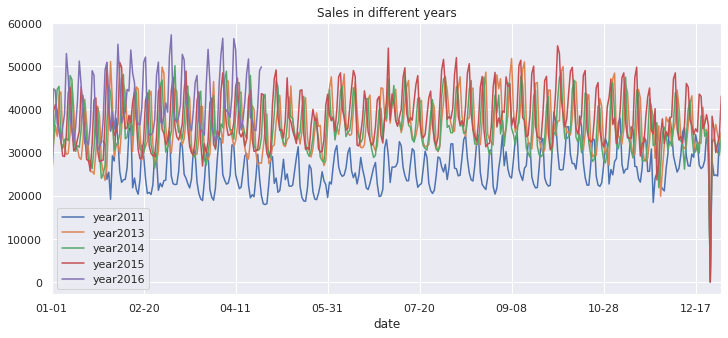

In [42]:
sales_year.plot()
plt.title("Sales in different years")
plt.savefig("Sales in different years.png")

In [43]:
events1_dict = {'date': calender['date'],
    'event_name':  calender['event_name_1'],
    'event_type':  calender['event_type_1']} #'date':  pd.to_datetime(calender['date']).apply(lambda x: x.date())
events2_dict = {'date': calender['date'],
    'event_name':  calender['event_name_2'],
    'event_type':  calender['event_type_2']}
events1 = pd.DataFrame(events1_dict).dropna()
events2 = pd.DataFrame(events1_dict).dropna()
# events.append(pd.DataFrame(events2_dict).dropna())#subset=['event_name'])
sales_events1 = pd.merge(sales_ts, events1, on=['date'])
sales_events1.set_index('date', drop=True, inplace=True)
sales_events1.head()

,total_sales,event_name,event_type
date,,,
2011-02-06,32736,SuperBowl,Sporting
2011-02-14,21804,ValentinesDay,Cultural
2011-02-21,23966,PresidentsDay,National
2011-03-09,22560,LentStart,Religious
2011-03-16,22765,LentWeek2,Religious


In [44]:
sales_events2 = pd.merge(sales_ts, events2, on=['date'])
sales_events2.set_index('date', drop=True, inplace=True)
sales_events2.head()

,total_sales,event_name,event_type
date,,,
2011-02-06,32736,SuperBowl,Sporting
2011-02-14,21804,ValentinesDay,Cultural
2011-02-21,23966,PresidentsDay,National
2011-03-09,22560,LentStart,Religious
2011-03-16,22765,LentWeek2,Religious


### Didn't add events2 annotations yet

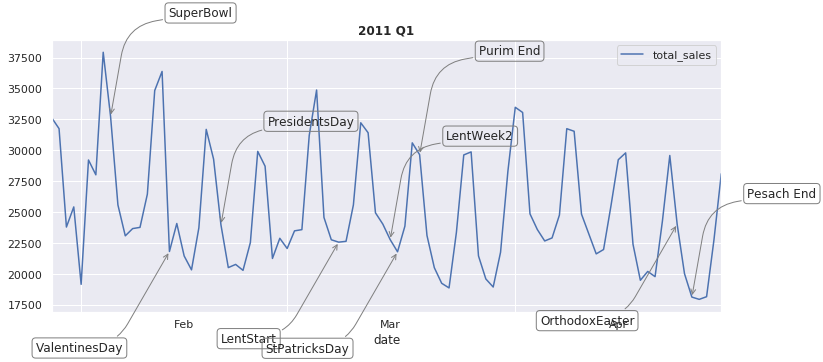

In [45]:
sales_2011 = sales_ts.loc['2011-01-29':'2011-04-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-01-29':'2011-04-30']
sales_events2_2011 = sales_events2.loc['2011-01-29':'2011-04-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q1",fontweight = "bold")
plt.savefig("2011 Q1")

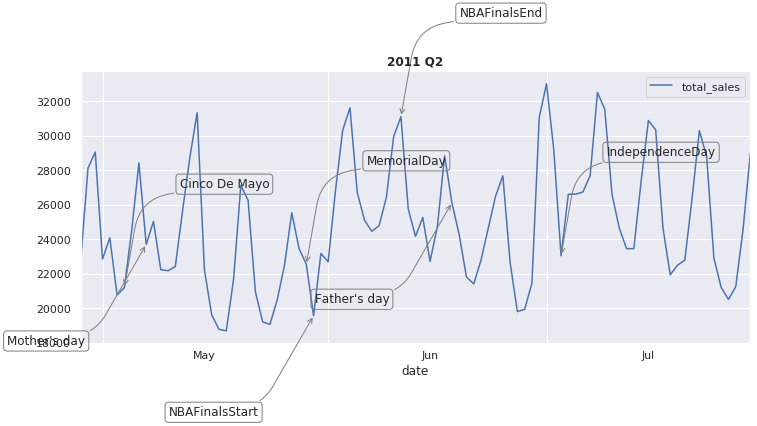

In [46]:
sales_2011 = sales_ts.loc['2011-04-29':'2011-07-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-04-29':'2011-07-30']
sales_events2_2011 = sales_events2.loc['2011-04-29':'2011-07-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2 == 1):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-100, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(100, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q2",fontweight = "bold")
plt.savefig("2011 Q2")

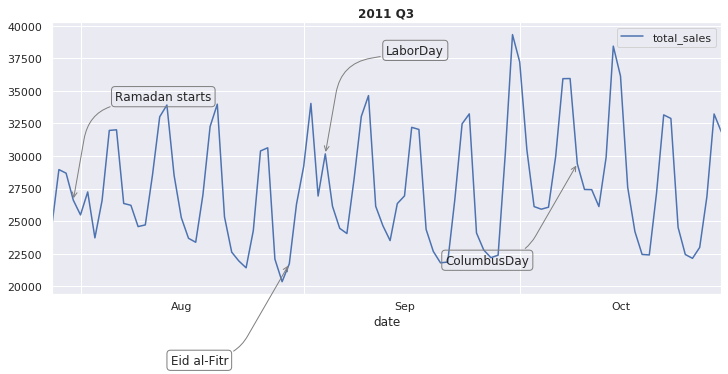

In [47]:
sales_2011 = sales_ts.loc['2011-07-29':'2011-10-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-07-29':'2011-10-30']
sales_events2_2011 = sales_events2.loc['2011-07-29':'2011-10-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q3",fontweight = "bold")
plt.savefig("2011 Q3")

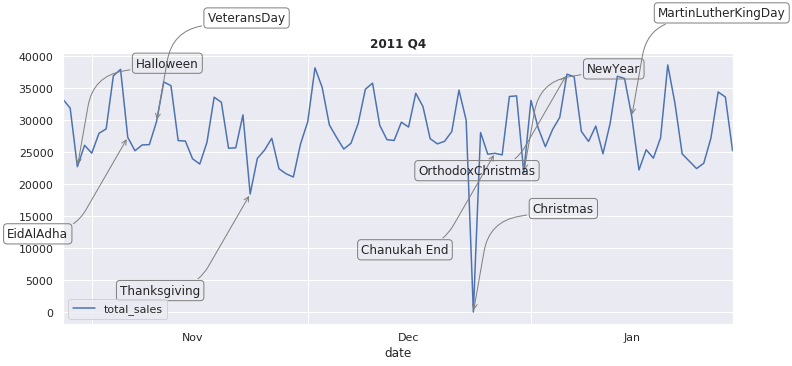

In [48]:
sales_2011 = sales_ts.loc['2011-10-29':'2012-01-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-10-29':'2012-01-30']
sales_events2_2011 = sales_events2.loc['2011-10-29':'2012-01-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q4",fontweight = "bold")
plt.savefig("2011 Q4")

In [83]:
sale_state = sales.groupby("state_id")[date].sum().reset_index().set_index('state_id').T
sale_state['date'] = pd.date_range(start_date, periods=1913).tolist()
sale_state.set_index('date', drop=True, inplace=True)
sale_state.sort_index(inplace=True)
sale_state.head(2000)

state_id,CA,TX,WI
date,,,
2011-01-29,14195,9438,8998
2011-01-30,13805,9630,8314
2011-01-31,10108,6778,6897
2011-02-01,11047,7381,6984
2011-02-02,9925,5912,3309
...,...,...,...
2016-04-20,15148,9600,10595
2016-04-21,14488,9602,10943
2016-04-22,17095,10615,12807


Text(0.5, 1.0, 'Daily sales in each state')

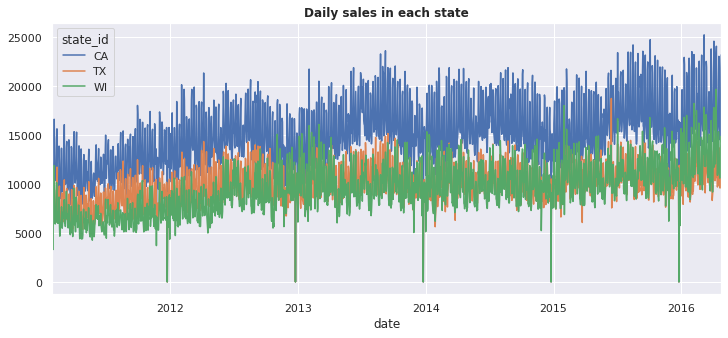

In [100]:
sale_state.plot()
plt.title("Daily sales in each state", fontweight = 'bold')

Text(0.5, 1.0, 'Daily sales in each state in 2011')

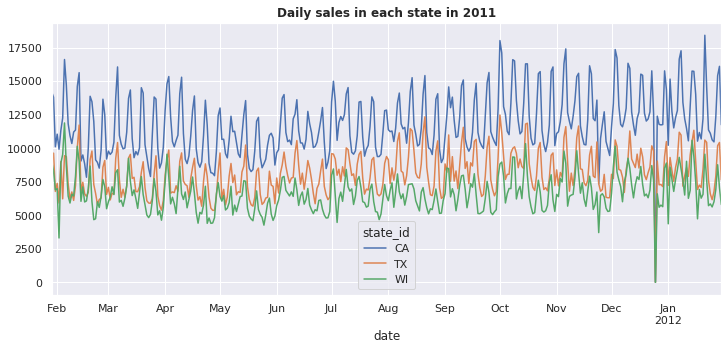

In [101]:
sale_state.loc['2011-01-29':'2012-01-30'].plot()
plt.title("Daily sales in each state in 2011", fontweight = 'bold')

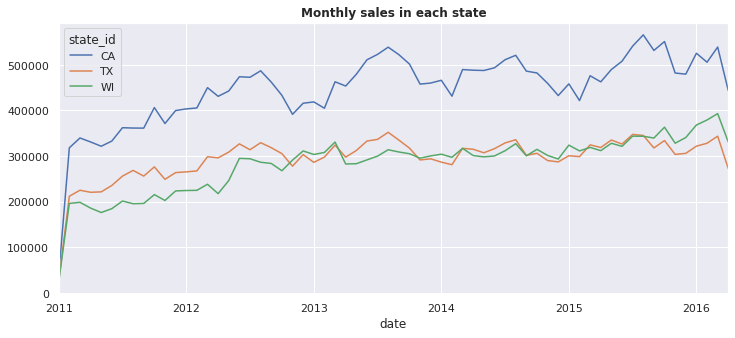

In [95]:
state_month = sale_state.groupby(pd.Grouper(freq='1M')).sum()
state_month.plot()
plt.title("Monthly sales in each state", fontweight = 'bold')
plt.savefig("Monthly sales in each state.png")

In [107]:
state_month.sort_values(by ='CA' , ascending=False)

state_id,CA,TX,WI
date,,,
2015-08-31,565672,345213,343456
2015-10-31,551025,334063,363349
2015-07-31,540951,347507,343689
2016-03-31,538930,343674,393142
2013-08-31,538700,352173,313940
...,...,...,...
2011-06-30,332948,235653,184779
2011-04-30,331004,220681,186028
2011-05-31,321566,221620,176376


In [133]:
state_month.sort_values(by ='TX' , ascending=False)

state_id,CA,TX,WI
date,,,
2013-08-31,538700,352173,313940
2015-07-31,540951,347507,343689
2015-08-31,565672,345213,343456
2016-03-31,538930,343674,393142
2013-07-31,522898,336647,299922
...,...,...,...
2011-03-31,339678,225162,198727
2011-05-31,321566,221620,176376
2011-04-30,331004,220681,186028


In [132]:
state_month.sort_values(by ='WI' , ascending=False)

state_id,CA,TX,WI
date,,,
2016-03-31,538930,343674,393142
2016-02-29,505704,328110,379113
2016-01-31,525392,321790,368104
2015-10-31,551025,334063,363349
2015-07-31,540951,347507,343689
...,...,...,...
2011-08-31,361436,268649,195609
2011-04-30,331004,220681,186028
2011-06-30,332948,235653,184779


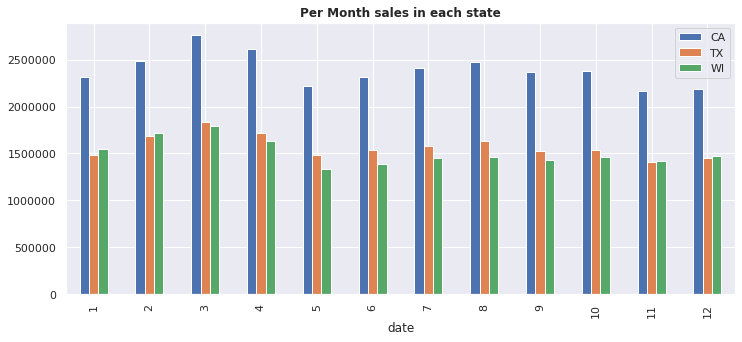

In [146]:
ca = state_month.groupby(state_month.index.month).agg({"CA":"sum"})
tx = state_month.groupby(state_month.index.month).agg({"TX":"sum"})
wi = state_month.groupby(state_month.index.month).agg({"WI":"sum"})
sales_month_state =  pd.merge(ca, tx, on=['date'])
sales_month_state =  pd.merge(sales_month_state, wi, on=['date'])
sales_month_state.plot(kind='bar')
plt.title("Per Month sales in each state", fontweight = 'bold')
plt.savefig("Per Month sales in each state.png")

Text(0.5, 1.0, 'Yearly sales in each state')

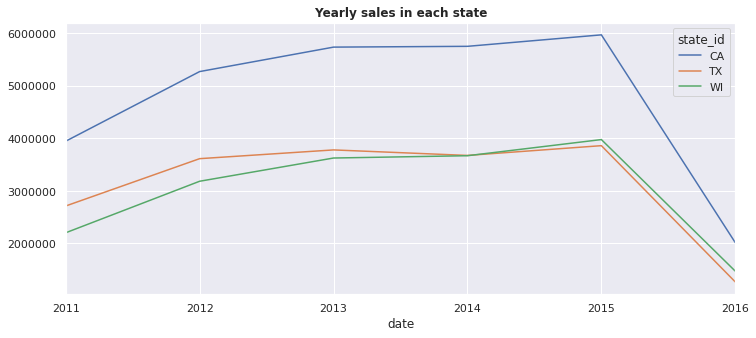

In [97]:
state_year = sale_state.groupby(pd.Grouper(freq='1Y')).sum()
state_year.plot()
plt.title("Yearly sales in each state", fontweight = 'bold')

## Skipped Store graphs

In [150]:
sale_cat = sales.groupby("cat_id")[date].sum().reset_index().set_index('cat_id').T
sale_cat['date'] = pd.date_range(start_date, periods=1913).tolist()
sale_cat.set_index('date', drop=True, inplace=True)
sale_cat.sort_index(inplace=True)
sale_cat.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729


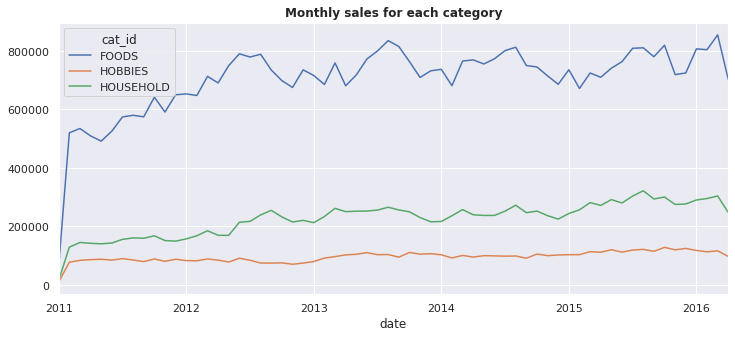

In [152]:
cat_month = sale_cat.groupby(pd.Grouper(freq='1M')).sum()
cat_month.plot()
plt.title("Monthly sales for each category", fontweight = 'bold')
plt.savefig("Monthly sales for each category.png")

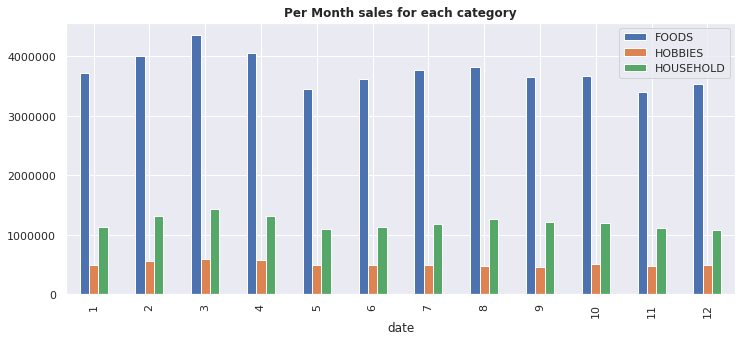

In [154]:
foods = cat_month.groupby(state_month.index.month).agg({"FOODS":"sum"})
hobbies = cat_month.groupby(state_month.index.month).agg({"HOBBIES":"sum"})
household = cat_month.groupby(state_month.index.month).agg({"HOUSEHOLD":"sum"})
sales_month_cat =  pd.merge(foods, hobbies, on=['date'])
sales_month_cat =  pd.merge(sales_month_cat, household, on=['date'])
sales_month_cat.plot(kind='bar')
plt.title("Per Month sales for each category", fontweight = 'bold')
plt.savefig("Per Month sales for each category.png")

In [148]:
sale_dept = sales.groupby("dept_id")[date].sum().reset_index().set_index('dept_id').T
sale_dept['date'] = pd.date_range(start_date, periods=1913).tolist()
sale_dept.set_index('date', drop=True, inplace=True)
sale_dept.sort_index(inplace=True)
sale_dept.head()

dept_id,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
date,,,,,,,
2011-01-29,2343,4094,16741,3610,154,4105,1584
2011-01-30,2216,4209,16333,3172,185,3858,1776
2011-01-31,1657,3174,12343,2497,185,2827,1100
2011-02-01,1508,3606,13764,2531,138,2732,1133
2011-02-02,1209,2869,10525,1714,100,1802,927


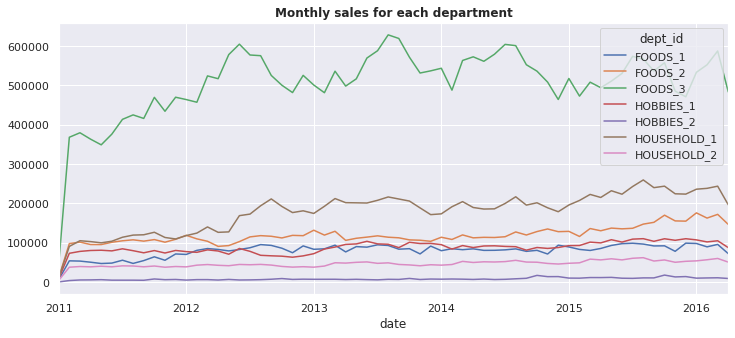

In [158]:
dept_month = sale_dept.groupby(pd.Grouper(freq='1M')).sum()
dept_month.plot()
plt.title("Monthly sales for each department", fontweight = 'bold')
plt.savefig("Monthly sales for each department.png")

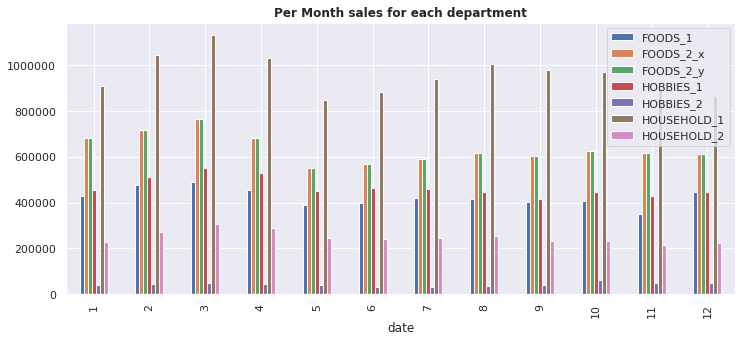

In [161]:
foods1 = dept_month.groupby(state_month.index.month).agg({"FOODS_1":"sum"})
foods2 = dept_month.groupby(state_month.index.month).agg({"FOODS_2":"sum"})
foods3 = dept_month.groupby(state_month.index.month).agg({"FOODS_2":"sum"})
hobbies1 = dept_month.groupby(state_month.index.month).agg({"HOBBIES_1":"sum"})
hobbies2 = dept_month.groupby(state_month.index.month).agg({"HOBBIES_2":"sum"})
household1 = dept_month.groupby(state_month.index.month).agg({"HOUSEHOLD_1":"sum"})
household2 = dept_month.groupby(state_month.index.month).agg({"HOUSEHOLD_2":"sum"})
# sales_month_cat =  pd.merge(foods, hobbies, on=['date'])
# sales_month_cat =  pd.merge(sales_month_cat, household, on=['date'])
dfs = [foods1, foods2, foods3, hobbies1, hobbies2, household1, household2]
sales_month_dept = reduce(lambda left,right: pd.merge(left,right,on='date'), dfs)
sales_month_dept.plot(kind='bar')
plt.title("Per Month sales for each department", fontweight = 'bold')
plt.savefig("Per Month sales for each department.png")

In [164]:
prices = pd.read_csv('m5-forecasting-accuracy/sell_prices.csv')
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
sell_prices_foods_1_001 = sell_prices.loc[(sell_prices.item_id=='FOODS_1_001') & (sell_prices.store_id == 'CA_1'), :]
sell_prices_foods_1_001_CA1 = sell_prices_foods_1_001.set_index('wm_yr_wk')
sell_prices_foods_1_001_CA1.head()
# sell_prices_foods_1_001.index

In [ ]:
sell_prices_foods_1_001_CA1.plot()
plt.show()

In [ ]:
sales_train_validation = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
sales_train_validation_foods_1_001 = sales_train_validation.loc[sales_train_validation.item_id=='FOODS_1_001', :]
sales_train_validation_foods_1_001.head()
# plt.plot(sales_train_validation, y, color='tab:red')
# plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
# plt.show()
# plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    